In [67]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [59]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data/', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


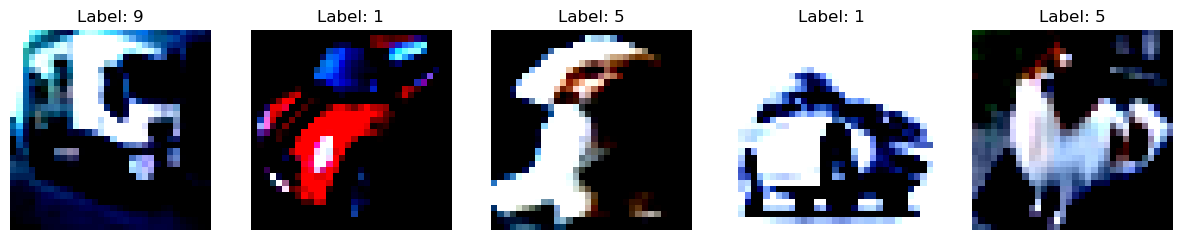

In [60]:
import matplotlib.pyplot as plt

# Show some sample images and their labels
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Convert tensor to numpy for visualization
images = images.numpy()
labels = labels.numpy()

# Plot the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax = axes[i]
    ax.imshow(images[i].transpose(1, 2, 0))  # Transpose to (height, width, channels)
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.show()


In [61]:
import torch.nn as nn
import torchvision.models as models

In [62]:
model = [3]

# Load the pretrained ResNet-18 model
model1 = models.resnet18(pretrained=True)

# Modify the final fully connected layer to match CIFAR-10 (10 classes)
model1.fc = nn.Linear(model1.fc.in_features, 10)

# Move the model to the appropriate device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)

# Load the pretrained ResNet-18 model
model2 = models.resnet18(pretrained=True)

# Modify the final fully connected layer to match CIFAR-10 (10 classes)
model2.fc = nn.Linear(model2.fc.in_features, 10)

# Move the model to the appropriate device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [166]:
print(model2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [63]:
# Define loss function (CrossEntropyLoss) and optimizer (SGD)
weight_decay = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.001, weight_decay = weight_decay)

In [64]:
# Define loss function (CrossEntropyLoss) and optimizer (SGD)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.001)

# Number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model1.train()  # Set the model to training mode
    running_loss = 0.0
    
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Print statistics
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}")
    
    
torch.save(model1, 'ResNet18_1.pth')


Epoch [1/10], Loss: 1.6335
Epoch [2/10], Loss: 1.3005
Epoch [3/10], Loss: 1.1452
Epoch [4/10], Loss: 1.0556
Epoch [5/10], Loss: 0.9699
Epoch [6/10], Loss: 0.9250
Epoch [7/10], Loss: 0.8642
Epoch [8/10], Loss: 0.8088
Epoch [9/10], Loss: 0.7646
Epoch [10/10], Loss: 0.7265


In [217]:
#This trains a model which is hopefully simpler

import torch.nn as nn
import torch.optim as optim
import torch.nn.utils.prune as prune
import torch.quantization

# L1 Regularization function
def l1_regularization(model2, l1_weight=0.0001):
    l1_norm = 0
    for param in model2.parameters():
        l1_norm += torch.sum(torch.abs(param))
    return l1_weight * l1_norm

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.0001, momentum=0.2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
num_epochs = 3

def gradual_pruning(model2, start_epoch, total_epochs, amount_per_step):
    for module in model2.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            prune.l1_unstructured(module, name='weight', amount=amount_per_step * (start_epoch / total_epochs))

for epoch in range(num_epochs):
    model2.train()
    
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        
        # L1 regularization
        l1_loss = sum(torch.norm(p, 1) for p in model2.parameters())
        loss += 0.00005 * l1_loss  # Scale L1 loss properly
        
        loss.backward()
        optimizer.step()

    # Apply pruning gradually
    gradual_pruning(model2, epoch + 1, num_epochs, amount_per_step=0.01)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    scheduler.step()  # Adjust learning rate
    
torch.save(model2, 'ResNet18_2b.pth')

Epoch [1/3], Loss: 9.9364


KeyboardInterrupt: 

In [91]:
compute_loss_sharpness(model1, criterion, test_loader)

0.005662924470231175

In [92]:
compute_gradient_norm(model1, criterion, test_loader)

149.29902856113813

In [93]:
compress_model_numpy(model1)

332424736

In [221]:
compute_loss_sharpness(model2, criterion, test_loader)

0.00023111710533166464

In [222]:
compute_gradient_norm(model2, criterion, test_loader)

3.687221837881655

In [220]:
compress_model_numpy(model2)

331963192

In [90]:
def compute_loss_sharpness(model, loss_fn, testloader, epsilon=1e-3):
    """Computes the sharpness measure by perturbing model parameters."""
    model.eval()
    total_sharpness = 0.0
    num_batches = 0

    original_params = {name: p.clone() for name, p in model.named_parameters()}

    for data, target in testloader:
        data, target = data.to(next(model.parameters()).device), target.to(next(model.parameters()).device)
        
        model.zero_grad()
        output = model(data)
        original_loss = loss_fn(output, target).item()

        # Perturb parameters
        for p in model.parameters():
            p.data += epsilon * torch.randn_like(p)

        perturbed_output = model(data)
        perturbed_loss = loss_fn(perturbed_output, target).item()

        # Restore original parameters
        for name, p in model.named_parameters():
            p.data = original_params[name]

        total_sharpness += perturbed_loss - original_loss
        num_batches += 1

    return total_sharpness / num_batches if num_batches > 0 else 0.0

def compute_gradient_norm(model, loss_fn, testloader):
    """Computes the average gradient norm over the test set."""
    model.eval()
    total_norm = 0.0
    num_batches = 0

    for data, target in testloader:
        data, target = data.to(next(model.parameters()).device), target.to(next(model.parameters()).device)
        
        model.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        
        batch_norm = torch.sqrt(sum(p.grad.norm()**2 for p in model.parameters() if p.grad is not None))
        total_norm += batch_norm.item()
        num_batches += 1

    return total_norm / num_batches if num_batches > 0 else 0.0

import gzip
import pickle

def compress_model_numpy(model):
    weights = np.concatenate([p.cpu().detach().numpy().flatten() for p in model.parameters()])
    model_bytes = pickle.dumps(weights)
    compressed = gzip.compress(model_bytes)
    return len(compressed) * 8  # Size in bits

In [223]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        
        out += identity
        out = F.relu(out)
        
        return out

class StitchingLayer(nn.Module):
    def __init__(self, C1, C2):
        super(StitchingLayer, self).__init__()
        self.bn1 = nn.BatchNorm2d(C1)
        self.conv1x1 = nn.Conv2d(in_channels=C1, out_channels=C2, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn2 = nn.BatchNorm2d(C2)
    
    def forward(self, x):
        x = self.bn1(x)
        x = self.conv1x1(x)
        x = self.bn2(x)
        return x

class ResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18, self).__init__()
        self.in_channels = 64
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(64, 2, stride=1)
        self.Stitching = StitchingLayer(64, 64)  # Added StitchingLayer
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
    
    def _make_layer(self, out_channels, blocks, stride):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        
        layers = []
        layers.append(BasicBlock(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))
        
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.Stitching(x)  # Pass through StitchingLayer
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

# Example usage
model3 = ResNet18(num_classes=10)
print(model3)

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [224]:
# Get the state_dict for each model
state_dict_1 = model1.state_dict()
state_dict_2 = model2.state_dict()
state_dict_3 = model3.state_dict()

# Identify keys for copying
keys_1 = list(state_dict_1.keys())
keys_2 = list(state_dict_2.keys())
keys_3 = list(state_dict_3.keys())

# Mapping function to handle different key formats
def get_matching_key(key, source_keys):
    if key in source_keys:
        return key
    if key.startswith("0.") and key[2:] in source_keys:
        return key[2:]  # Remove '0.' prefix if necessary
    if key.endswith("_orig") and key[:-5] in source_keys:
        return key[:-5]  # Remove '_orig' suffix if necessary
    return None

for key in keys_3:
    match_key_1 = get_matching_key(key, keys_1)
    match_key_2 = get_matching_key(key, keys_2)
    
    if "layer1" in key or "conv1" in key or "bn1" in key or "maxpool" in key:
        if match_key_2:
            state_dict_3[key] = state_dict_2[match_key_2]
    elif "layer2" in key or "layer3" in key or "layer4" in key or "fc" in key:
        if match_key_1:
            state_dict_3[key] = state_dict_1[match_key_1]
    elif "stitching" in key:
        print(f"Skipping {key}, keeping original initialization for StitchingLayer")

# Load the modified state_dict into model3
model3.load_state_dict(state_dict_3)

<All keys matched successfully>

In [167]:
#print(state_dict_3.keys())  # Check available keys
#print(state_dict_1.keys())  # Check keys in model1
#print(state_dict_2.keys())  # Check keys in model2

In [225]:
def train_stitching_layer(model3, dataloader, criterion, optimizer, num_epochs=5):
    # Loop through all model parameters
    for name, param in model3.named_parameters():
        if 'Stitching' in name:  # Ensure we target the stitching layer by checking its name
            param.requires_grad = True  # Allow gradients for the stitching layer
        else:
            param.requires_grad = False  # Freeze other layers

    model3.to(device)
    model3.train()  # Set the model to training mode
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model3(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backpropagate to calculate gradients
            optimizer.step()  # Update weights

            running_loss += loss.item()  # Accumulate loss for this epoch
        
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")
    
    print("Training complete.")


In [232]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.0005, momentum=0.3)

In [233]:
train_stitching_layer(model3, trainloader, criterion, optimizer, num_epochs=5)

Epoch 1/5, Loss: 2.6446880706596376
Epoch 2/5, Loss: 2.630164176950455
Epoch 3/5, Loss: 2.6253169284629823
Epoch 4/5, Loss: 2.629913808584213
Epoch 5/5, Loss: 2.622219603962898
Training complete.


In [56]:
import torch
import torch.nn as nn
import torchvision.models as models
import copy

class StitchingLayer(nn.Module):
    def __init__(self, C1, C2):
        super(StitchingLayer, self).__init__()
        self.bn1 = nn.BatchNorm2d(C1)
        self.conv1x1 = nn.Conv2d(in_channels=C1, out_channels=C2, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn2 = nn.BatchNorm2d(C2)
    
    def forward(self, x):
        x = self.bn1(x)
        x = self.conv1x1(x)
        x = self.bn2(x)
        return x

def get_last_conv_out_channels(layer):
    """Helper function to get output channels from the last Conv2d layer in a given layer/block."""
    if isinstance(layer, nn.Sequential):  
        last_block = list(layer.children())[-1]  # Get the last BasicBlock
        if isinstance(last_block, nn.Module):  
            for sub_layer in reversed(list(last_block.children())):  
                if isinstance(sub_layer, nn.Conv2d):  
                    return sub_layer.out_channels
    return None

def get_first_conv_in_channels(layer):
    """Helper function to get input channels from the first Conv2d layer in a given layer/block."""
    if isinstance(layer, nn.Sequential):  
        first_block = list(layer.children())[0]  # Get the first BasicBlock
        if isinstance(first_block, nn.Module):  
            for sub_layer in list(first_block.children()):  
                if isinstance(sub_layer, nn.Conv2d):  
                    return sub_layer.in_channels
    return None

def insert_stitching_layer(model, target_layer_name):
    """
    Inserts a stitching layer after the specified layer in ResNet.
    Automatically detects C1 (output channels of target layer) and C2 (input channels of next layer).
    
    Args:
        model (nn.Module): The original ResNet model.
        target_layer_name (str): The layer after which to insert the stitching layer.
    
    Returns:
        nn.Module: Modified ResNet model with the stitching layer inserted.
    """
    # Create a deep copy of the model so we don't modify the original
    new_model = copy.deepcopy(model)

    # Get all named layers in order
    layers = list(new_model.named_children())

    # Find C1 (output channels of the target layer) and C2 (input channels of the next layer)
    C1, C2 = None, None
    for i, (name, module) in enumerate(layers):
        if name == target_layer_name:
            C1 = get_last_conv_out_channels(module)  # Get C1 from the last conv layer in target block
            if i + 1 < len(layers):  # Ensure there's a next layer
                C2 = get_first_conv_in_channels(layers[i + 1][1])  # Get C2 from the first conv layer in next block
            break

    if C1 is None or C2 is None:
        raise ValueError(f"Could not determine C1 and C2 for layer '{target_layer_name}'. Check layer names.")

    # Create new layer sequence with stitching inserted
    new_layers = nn.Sequential()
    for name, module in layers:
        new_layers.add_module(name, module)  # Add existing layer
        if name == target_layer_name:  # If this is the target layer
            stitching = StitchingLayer(C1, C2)
            new_layers.add_module("stitching_layer", stitching)  # Insert stitching layer

    # Rebuild the model with modified layers
    new_model = nn.Sequential(new_layers)

    return new_model


In [103]:
model3 = models.resnet18(pretrained=True)
target_layer_name = "layer1"
model3 = insert_stitching_layer(model3, target_layer_name)

# Print model to verify placement
print(model3)

Sequential(
  (0): Sequential(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [118]:
import torch

def transfer_weights(model3, model1, model2, stitching_layer_name="stitching_layer"):
    model3_state_dict = model3.state_dict()
    model1_state_dict = model1.state_dict()
    model2_state_dict = model2.state_dict()
    
    stitching_found = False
    new_state_dict = {}
    
    for name, param in model3_state_dict.items():
        if stitching_layer_name in name:
            stitching_found = True
        
        if not stitching_found:  # Before stitching layer, copy from model1
            if name in model1_state_dict:
                new_state_dict[name] = model1_state_dict[name].clone()
            else:
                raise KeyError(f"{name} not found in model1")
        else:  # After stitching layer, copy from model2
            if name in model2_state_dict:
                new_state_dict[name] = model2_state_dict[name].clone()
            else:
                raise KeyError(f"{name} not found in model2")
    
    model3.load_state_dict(new_state_dict)
    return model3


In [119]:
def train_stitching_layer(model3, dataloader, criterion, optimizer, num_epochs=5):
    for name, param in model3.named_parameters():
        stitching_layer_name ="stitching_layer"
        if stitching_layer_name in name:
            param.requires_grad = True  # Keep stitching layer trainable
        else:
            param.requires_grad = False  # Freeze all other layers
    model3.to(device)
    model3.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model3(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")
    
    print("Training complete.")

In [120]:
train_stitching_layer(model3, trainloader, criterion, optimizer, num_epochs=5)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2048x1 and 512x1000)

In [234]:
# Accuracy test
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
net = model1
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 16.26%
